In [190]:
import pandas as pd
import os
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Predicting Brest Cancer
# Modeled by Daniel Glownia 
#
# Source: University of Wisconsin, Clinical Sciences Center 


#Read the data from a file
names = ['id',
         'ClumpThickness',
         'UniformityCellSize',
         'UniformityCellShape',
         'MarginalAdhesion',
         'SingleEpithelialCellSize',
         'BareNuclei',
         'BlandChromatin',
         'NormalNucleoli',
         'Mitoses',
         'Class'] #(2 for benign, 4 for malignant)
df = pd.read_csv('./Data/DiagnosticWisconsinBreastCancerData.txt', header=None, names=names, sep=',')
df = df.drop('id', 1)
print(df.size)


6990


In [179]:
#Transform the data
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

malignant = df[(df.Class == 4)]
benign = df[(df.Class == 2)]

print(df.dtypes)

ClumpThickness                int64
UniformityCellSize            int64
UniformityCellShape           int64
MarginalAdhesion              int64
SingleEpithelialCellSize      int64
BareNuclei                  float64
BlandChromatin                int64
NormalNucleoli                int64
Mitoses                       int64
Class                         int64
dtype: object


In [204]:
#Variance 
#print(malignant.var())
#print(benign.var())

#std. div.
#print(malignant.std())
#print(benign.std())
malignant.iloc[0:0,0:9]
malignant.head()

,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
5,8,10,10,8,7,10.0,9,7,1,4
12,5,3,3,3,2,3.0,4,4,1,4
14,8,7,5,10,7,9.0,5,5,4,4
15,7,4,6,4,6,1.0,4,3,1,4
18,10,7,7,6,4,10.0,4,1,2,4


In [194]:
#Corrilation Matrix For Malignant Tumors 
corr_matrix_mal = pd.DataFrame(np.corrcoef(x=malignant.iloc[:,0:9].values.tolist(),rowvar=False))
corr_matrix_mal

,0,1,2,3,4,5,6,7,8
0,1.000000,0.097438,0.112548,-0.144148,0.017152,-0.036078,-0.018025,-0.013174,0.118206
1,0.097438,1.000000,0.720782,0.320449,0.460828,-0.039891,0.388866,0.299189,0.241080
2,0.112548,0.720782,1.000000,0.267325,0.383091,0.052947,0.338472,0.309652,0.209983
3,-0.144148,0.320449,0.267325,1.000000,0.192775,0.193632,0.337764,0.184831,0.201249
4,0.017152,0.460828,0.383091,0.192775,1.000000,-0.031428,0.216225,0.231148,0.333305
5,-0.036078,-0.039891,0.052947,0.193632,-0.031428,1.000000,0.136894,-0.083194,-0.037522
6,-0.018025,0.388866,0.338472,0.337764,0.216225,0.136894,1.000000,0.253494,0.059304
7,-0.013174,0.299189,0.309652,0.184831,0.231148,-0.083194,0.253494,1.000000,0.222353
8,0.118206,0.241080,0.209983,0.201249,0.333305,-0.037522,0.059304,0.222353,1.000000


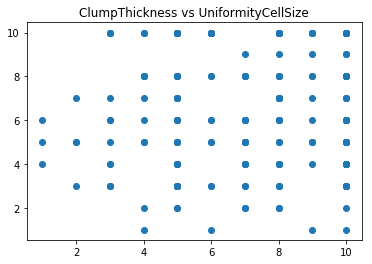

[[ 1.          0.09743788]
 [ 0.09743788  1.        ]]


In [214]:
#Corrilation plots for predictors
x = malignant.ClumpThickness
y = malignant.UniformityCellSize

plt.scatter(x, y)
plt.title("ClumpThickness vs UniformityCellSize")

plt.show()
print(np.corrcoef([x,y]))

In [188]:
#Corrilation Matrix For Malignant Tumors
corr_matrix_ben = pd.DataFrame(np.corrcoef(x=malignant.iloc[:,0:9].values.tolist(),rowvar=False))
corr_matrix_ben

,0,1,2,3,4,5,6,7,8
0,1.000000,0.097438,0.112548,-0.144148,0.017152,-0.036078,-0.018025,-0.013174,0.118206
1,0.097438,1.000000,0.720782,0.320449,0.460828,-0.039891,0.388866,0.299189,0.241080
2,0.112548,0.720782,1.000000,0.267325,0.383091,0.052947,0.338472,0.309652,0.209983
3,-0.144148,0.320449,0.267325,1.000000,0.192775,0.193632,0.337764,0.184831,0.201249
4,0.017152,0.460828,0.383091,0.192775,1.000000,-0.031428,0.216225,0.231148,0.333305
5,-0.036078,-0.039891,0.052947,0.193632,-0.031428,1.000000,0.136894,-0.083194,-0.037522
6,-0.018025,0.388866,0.338472,0.337764,0.216225,0.136894,1.000000,0.253494,0.059304
7,-0.013174,0.299189,0.309652,0.184831,0.231148,-0.083194,0.253494,1.000000,0.222353
8,0.118206,0.241080,0.209983,0.201249,0.333305,-0.037522,0.059304,0.222353,1.000000


In [100]:
#Fit the model 
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:10], 
                                                   df.Class, 
                                                   test_size=0.4, 
                                                   random_state=0)
clf = SGDClassifier()

In [140]:
#Crossfold Validation 
scores = cross_val_score(clf, df.iloc[:,0:10], df.Class, cv=6)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.04)


In [ ]:
from sklearn.metrics import precision_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1] 
